## Logistic Regression
- Data Preparation
- Visualization
- Create train and test data
- Data Normalisation
- Logistic Model from scratch
- Predictions
- Decision Boundary
- sklearn

### Generate Data

In [1]:
## Data - Generate using Numpy

import numpy as np
import matplotlib.pyplot as plt

In [2]:
mean_01=np.array([1,0.5])
cov_01=np.array([[1,0.1],[0.1,1.2]])

mean_02=np.array([4,5])
cov_02=np.array([[1.2,0.1],[0.1,1.3]])

dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


### Visualization

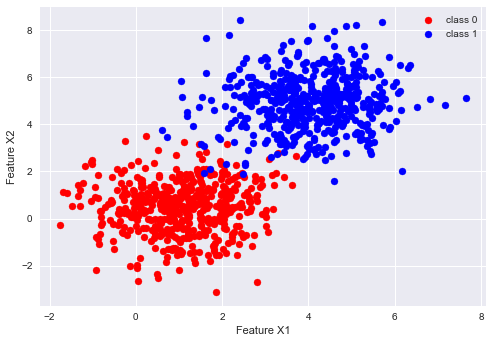

In [3]:
plt.style.use('seaborn')
plt.scatter(dist_01[:,0],dist_01[:,1],color='red',label="class 0")
plt.scatter(dist_02[:,0],dist_02[:,1],color='blue',label="class 1")
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')
plt.legend()
plt.show()

### Train and Test split

In [4]:
data=np.zeros((1000,3))

In [5]:
data[:500,:2]=dist_01
data[500:,:2]=dist_02
data[500:,-1]=1

In [6]:
data.shape

(1000, 3)

In [7]:
#randomly shuffle data
np.random.shuffle(data)
print(data[:10])

[[2.40069806 0.11133209 0.        ]
 [5.08594015 5.34136445 1.        ]
 [0.73538435 0.36704296 0.        ]
 [4.84034418 4.70657138 1.        ]
 [0.93600198 0.31332506 0.        ]
 [1.1772123  1.10627473 0.        ]
 [1.50000185 1.55954912 0.        ]
 [2.91045732 5.70686661 1.        ]
 [3.80375296 5.92535811 1.        ]
 [3.74240475 4.37754598 1.        ]]


In [8]:
#divide the data into train and tet part
split=int(0.8*data.shape[0])
X_train=data[:split,:-1]
X_test=data[split:,:-1]
Y_train=data[:split,-1]
Y_test=data[split:,-1]

In [9]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((800, 2), (800,), (200, 2), (200,))

### Data Normalisation

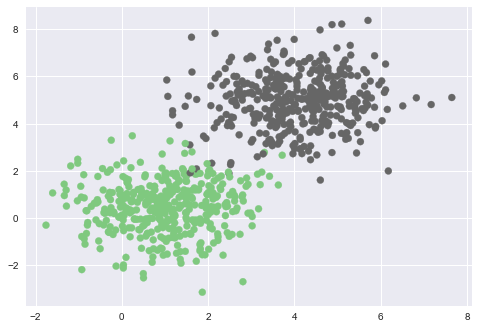

In [10]:
#plot the training data
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Accent)
plt.show()

In [11]:
# Data Normalisation - 0 mean and 1 std deviation along each axis

x_mean = X_train.mean(axis=0)
x_std = X_train.std(axis=0)

# Apply the transformation
X_train = (X_train - x_mean)/x_std

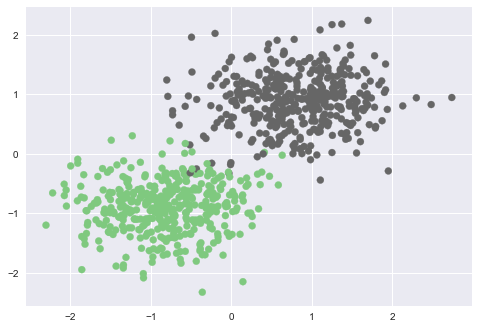

In [12]:
#plot the training data after normalisation

plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Accent)
plt.show()

In [13]:
# Apply the same transformation to test data so that you don't end up changing the distribution of the test data

X_test = (X_test-x_mean)/x_std

### Logistic Regression Implementation from scratch

In [14]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

In [15]:
def hypothesis(X,theta):
    """
    X - entire data array (m,n+1)
    theta - np.array(n+1,1)
    return a vector 
    """ 
    return sigmoid(np.dot(X,theta))

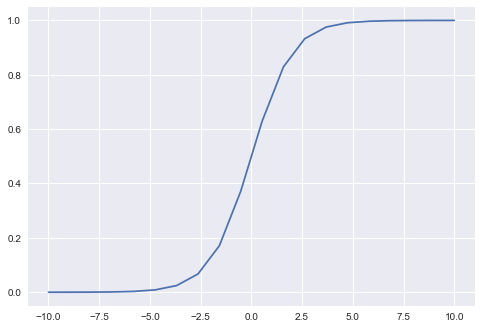

In [16]:
## roughly plotting sigmoid values for understanding 
a=np.linspace(-10,10,20)
plt.plot(a,sigmoid(a))

In [17]:
def error(X,y,theta):
    """
    X - (m,n+1)
    y - (m,1)
    theta - (n+1,1)
    return:
        scalar_value - loss   
    """
    hi = hypothesis(X,theta)
    e=-1*np.mean((y*np.log(hi) + ((1-y)*np.log(1-hi))))
    
    return e

In [18]:
def gradient(X,y,theta):
    """
    X - (m,n+1)
    y - (m,1)
    theta - (n+1,1)
    return:
        gradient_vector - (n+1,1)
    """ 
    hi = hypothesis(X,theta)
    grad = -np.dot(X.T,(y-hi))
    m=X.shape[0]
    return grad/m

In [19]:
def gradient_descent(X,y,lr=0.5,max_iterations=500):
    n=X.shape[1]
    theta=np.zeros((n,1))
    error_list = []
    for i in range(max_iterations):
        err=error(X,y,theta)
        error_list.append(err)
        
        grad=gradient(X,y,theta)
        
        #update
        theta=theta - lr*grad
        
    return (theta,error_list)
        
        

In [20]:
ones=np.ones((X_train.shape[0],1))
X_new_train = np.hstack((ones,X_train))
X_new_train.shape

(800, 3)

In [21]:
Y_train=Y_train.reshape((-1,1)) ## everywhere we have assumed y to be a column vector

In [22]:
theta,error_list = gradient_descent(X_new_train,Y_train)

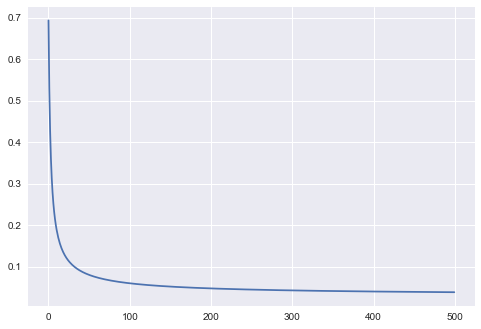

In [23]:
plt.plot(error_list)

In [24]:
theta

array([[0.25552988],
       [2.66423734],
       [4.72337398]])

### Visualize Decision Surface

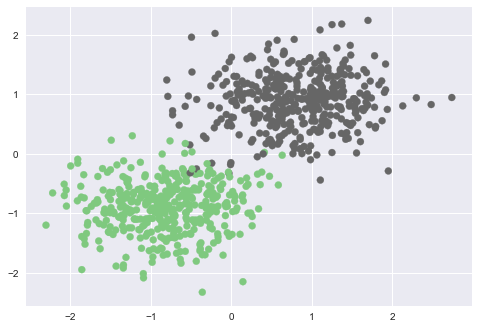

In [25]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train.reshape((-1,)),cmap=plt.cm.Accent)

plt.show()

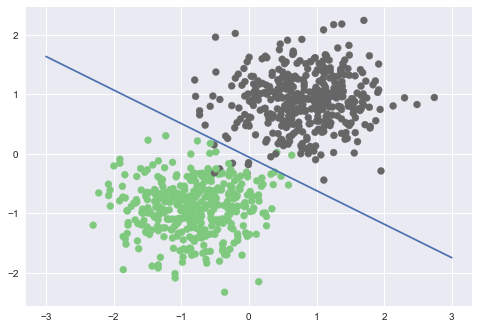

In [26]:
x1=np.arange(-3,4)
x2=-(theta[0] + theta[1] * x1)/theta[2]
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train.reshape((-1,)),cmap=plt.cm.Accent)
plt.plot(x1,x2)
plt.show()

### Predictions & Accuracy

In [27]:
X_new_test=np.hstack((np.ones((X_test.shape[0],1)),X_test))
print(X_new_test.shape)
print(X_new_test[:3,:])

(200, 3)
[[ 1.         -0.07595746 -0.34788193]
 [ 1.         -0.93933221 -1.59359336]
 [ 1.          1.55608385  0.05106686]]


In [28]:
def predict(X,theta):
    h=hypothesis(X,theta)
    output = np.zeros((h.shape))
    output[h>0.5] = 1
    output = output.astype('int')
    return output


In [29]:
train_predicts = predict(X_new_train,theta)   
test_predicts = predict(X_new_test,theta)


In [37]:
def accuracy(actual,preds):
    actual = actual.astype('int')
    actual=actual.reshape((-1,1))
    acc = np.sum(actual == preds)/actual.shape[0]
    return acc*100

In [39]:
train_acc = accuracy(Y_train,train_predicts)
print(train_acc)

98.875


In [40]:
test_acc = accuracy(Y_test,test_predicts)
print(test_acc)

97.5


### Sklearn for Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression ## can only do linear classification for non linear SVM and neural network

In [44]:
model = LogisticRegression()

In [45]:
model.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [46]:
theta_0 = model.intercept_
theta_s = model.coef_
print(theta_0,theta_s)

[0.2584715] [[2.35416088 4.59575691]]


In [47]:
model.score(X_train,Y_train)

0.98875

In [48]:
model.score(X_test,Y_test)

0.975

In [49]:
y_pred = model.predict(X_test)

In [50]:
y_pred.shape

(200,)